# This notebook shows short examples of the fly RL environments
* Flight imitation
* Walking imitation
* Vision-guided flight

Please see the `flybody` [publication](https://www.biorxiv.org/content/10.1101/2024.03.11.584515v1) for more details.

#### To run this notebook, please follow these steps:
1. Download reference flight and walking data, and trained policies, at https://doi.org/10.25378/janelia.25309105
2. Unzip the downloaded files
3. Specify the paths to the data and policy files in the cell below

Installing and using python3.9, not used in this script as python3.10 is needed

In [10]:
!python --version
# Add deadsnakes PPA
!sudo add-apt-repository ppa:deadsnakes/ppa -y

# Update package list
!sudo apt-get update

# Install python3.9
!sudo apt-get install python3.9 -y

# Configure update-alternatives for python3.9
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 3

!sudo update-alternatives --config python3

Python 3.10.12
Repository: 'deb https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu/ jammy main'
Description:
This PPA contains more recent Python versions packaged for Ubuntu.

Disclaimer: there's no guarantee of timely updates in case of security problems or other issues. If you want to use them in a security-or-otherwise-critical environment (say, on a production server), you do so at your own risk.

Update Note
Please use this repository instead of ppa:fkrull/deadsnakes.

Reporting Issues

Issues can be reported in the master issue tracker at:
https://github.com/deadsnakes/issues/issues

Supported Ubuntu and Python Versions

- Ubuntu 22.04 (jammy) Python3.7 - Python3.9, Python3.11 - Python3.13
- Ubuntu 24.04 (noble) Python3.7 - Python3.11, Python3.13
- Note: Python 3.10 (jammy), Python3.12 (noble) are not provided by deadsnakes as upstream ubuntu provides those packages.

Why some packages aren't built:
- Note: for jammy and noble, older python versions requre libssl<3 so they a

In [16]:
# Install python3.9-venv which often brings in ensurepip
!sudo apt-get install python3.9-venv -y

# Retry installing ensurepip and upgrading pip for python3.9
!python3.9 -m ensurepip --default-pip
!python3.9 -m pip install --upgrade pip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3.9-distutils python3.9-lib2to3
The following NEW packages will be installed:
  python3.9-distutils python3.9-lib2to3 python3.9-venv
0 upgraded, 3 newly installed, 0 to remove and 192 not upgraded.
Need to get 3,477 kB of archives.
After this operation, 4,572 kB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.9-lib2to3 all 3.9.25-1+jammy1 [127 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.9-distutils all 3.9.25-1+jammy1 [193 kB]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.9-venv amd64 3.9.25-1+jammy1 [3,157 kB]
Fetched 3,477 kB in 3s (1,274 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based front

Change python version to 3.10, which is needed here

In [1]:
!sudo update-alternatives --config python3
!python --version

There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                 Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.11   2         auto mode
  1            /usr/bin/python3.10   1         manual mode
  2            /usr/bin/python3.11   2         manual mode

Press <enter> to keep the current choice[*], or type selection number: 1
update-alternatives: using /usr/bin/python3.10 to provide /usr/bin/python3 (python3) in manual mode
Python 3.10.12


In [5]:
# Update package lists and attempt to fix any broken archives
!sudo apt-get update --fix-missing

# Install pip for the default python3 (which should be 3.10) using apt
!sudo apt-get install python3-pip -y

# Upgrade pip for python3.10
!python3.10 -m pip install --upgrade pip

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.4 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,836 kB]
Get:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,153 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://arch

In [6]:
!pip install numpy==1.26.4 scipy==1.11.4 --force-reinstall

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 131.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 59.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [scipy]


In [7]:
# If in Colab, run this cell to install flybody. Don't forget to select GPU!!
# Otherwise, if running notebook locally, skip this cell.

import os
import subprocess
if subprocess.run('nvidia-smi').returncode:
  raise RuntimeError(
      'Cannot communicate with GPU. '
      'Make sure you are using a GPU Colab runtime. '
      'Go to the Runtime menu and select Choose runtime type.')

# Add an ICD config so that glvnd can pick up the Nvidia EGL driver.
# This is usually installed as part of an Nvidia driver package, but the Colab
# kernel doesn't install its driver via APT, and as a result the ICD is missing.
# (https://github.com/NVIDIA/libglvnd/blob/master/src/EGL/icd_enumeration.md)
NVIDIA_ICD_CONFIG_PATH = '/usr/share/glvnd/egl_vendor.d/10_nvidia.json'
if not os.path.exists(NVIDIA_ICD_CONFIG_PATH):
  with open(NVIDIA_ICD_CONFIG_PATH, 'w') as f:
    f.write("""{
    "file_format_version" : "1.0.0",
    "ICD" : {
        "library_path" : "libEGL_nvidia.so.0"
    }
}
""")

!pip install --upgrade pip

!python -m pip install "flybody[ray] @ git+https://github.com/TuragaLab/flybody.git"

# Configure MuJoCo to use the EGL rendering backend (requires GPU).
%env MUJOCO_GL=egl

FileNotFoundError: [Errno 2] No such file or directory: 'nvidia-smi'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# Baseline pattern for wingbeat pattern generator.
wpg_pattern_path = '/content/drive/MyDrive/ai/datasets_flight-imitation/wing_pattern_fmech.npy'

# Flight and walking reference data.
ref_flight_path = '/content/drive/MyDrive/ai/datasets_flight-imitation/flight-dataset_saccade-evasion_augmented.hdf5'
ref_walking_path = '/content/drive/MyDrive/ai/datasets_walking-imitation/walking-dataset_female-only_snippets-16252_trk-files-0-9.hdf5'

# Trained policies.
flight_policy_path = '/content/drive/MyDrive/ai/trained-fly-policies/flight'
walk_policy_path = '/content/drive/MyDrive/ai/trained-fly-policies/walking'
vision_bumps_path = '/content/drive/MyDrive/ai/trained-fly-policies/vision-bumps'
vision_trench_path = '/content/drive/MyDrive/ai/trained-fly-policies/vision-trench'

# Imports

In [ ]:
import numpy as np
import PIL.ImageDraw

import tensorflow as tf
import tensorflow_probability as tfp
from acme import wrappers

from flybody.fly_envs import (
    flight_imitation,
    walk_imitation,
    vision_guided_flight,
)
from flybody.tasks.task_utils import (
    get_random_policy,
    real2canonical,
)
from flybody.agents.utils_tf import TestPolicyWrapper
from flybody.utils import (
    display_video,
    rollout_and_render,
)

In [ ]:
# Prevent tensorflow from stealing all gpu memory.
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

# Helpful functions for rendering

In [ ]:
def blow(x, repeats=2):
    """Repeat columns and rows requested number of times."""
    return np.repeat(np.repeat(x, repeats, axis=0), repeats, axis=1)


def vision_rollout_and_render(env, policy, camera_id=1,
                              eye_blow_factor=5, **render_kwargs):
    """Run vision-guided flight episode and render frames, including eyes."""
    frames = []
    timestep = env.reset()
    # Run full episode until it ends.
    while timestep.step_type != 2:
        # Render eyes and scene.
        pixels = env.physics.render(camera_id=camera_id, **render_kwargs)
        eyes = eye_pixels_from_observation(
            timestep, blow_factor=eye_blow_factor)
        # Add eye pixels to scene.
        pixels[0:eyes.shape[0], 0:eyes.shape[1], :] = eyes
        frames.append(pixels)
        # Step environment.
        action = policy(timestep.observation)
        timestep = env.step(action)
    return frames


def eye_pixels_from_observation(timestep, blow_factor=4):
    """Get current eye view from timestep.observation."""
    # In the actual task, the averaging over axis=-1 is done by the visual
    # network as a pre-processing step, so effectively the visual observations
    # are gray-scale.
    left_eye = timestep.observation['walker/left_eye'].mean(axis=-1)
    right_eye = timestep.observation['walker/right_eye'].mean(axis=-1)
    pixels = np.concatenate((left_eye, right_eye), axis=1)
    pixels = np.tile(pixels[:, :, None], reps=(1, 1, 3))
    pixels = blow(pixels, blow_factor)
    half_size = pixels.shape[1] // 2
    # Add white line to separate eyes.
    pixels = np.concatenate((pixels[:, :half_size, :],
                            255*np.ones((blow_factor*32, 2, 3)),
                            pixels[:, half_size:, :]), axis=1)
    pixels = pixels.astype('uint8')
    return pixels


def eye_pixels_from_cameras(physics, **render_kwargs):
    """Render two-eye view, assuming eye cameras have particular names."""
    for i in range(physics.model.ncam):
        name = physics.model.id2name(i, 'camera')
        if 'eye_left' in name:
            left_eye = physics.render(camera_id=i, **render_kwargs)
        if 'eye_right' in name:
            right_eye = physics.render(camera_id=i, **render_kwargs)
    pixels = np.hstack((left_eye, right_eye))
    return pixels


# Frame width and height for rendering.
render_kwargs = {'width': 640, 'height': 480}

# 1. Flight imitation environment

In this task, the fly model is required to track flight trajectories of real reference flies by matching their center-of-mass position and body orientation. The wing motion is controlled by a combination of the policy network and the wingbeat pattern generator. A single policy is trained to track all the trajectories in the flight dataset.

Let's create the flight imitation environment and visualize the initial state.

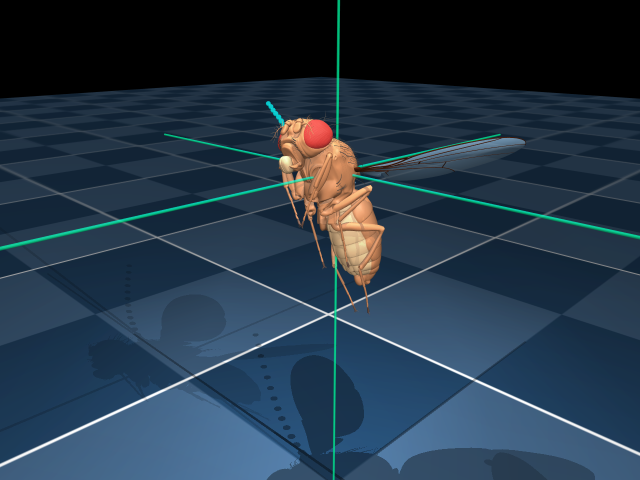

In [ ]:
env = flight_imitation(ref_flight_path,
                       wpg_pattern_path,
                       terminal_com_dist=float('inf'))
env = wrappers.SinglePrecisionWrapper(env)
env = wrappers.CanonicalSpecWrapper(env, clip=True)

_ = env.reset()
pixels = env.physics.render(camera_id=1, **render_kwargs)
PIL.Image.fromarray(pixels)

Create dummy random-action policy, run episode, and make video. The gray "ghost" fly indicates the reference fly position, which the model is required to track.

In [ ]:
random_policy = get_random_policy(env.action_spec())

frames = rollout_and_render(env, random_policy, run_until_termination=True,
                            camera_ids=1, **render_kwargs)
display_video(frames)

Load trained policy, run episode, and make video.

In [ ]:
flight_policy = tf.saved_model.load(flight_policy_path)
# Wrap policy to work with non-batched observations at test time.
flight_policy = TestPolicyWrapper(flight_policy)

In [ ]:
frames = rollout_and_render(env, flight_policy, run_until_termination=True,
                            camera_ids=1, **render_kwargs)
display_video(frames)

# 2. Walking imitation environment

In this task, the fly model is required to track walking trajectories of real reference flies by matching their (i) center-of-mass position, (ii) body orientation, and (iii) detailed leg movement. A single policy is trained to track all trajectories in the walking dataset.

Let's create walking environment and visualize the initial state.

In [ ]:
env = walk_imitation(ref_path=ref_walking_path,
                     terminal_com_dist=float('inf'))
env = wrappers.SinglePrecisionWrapper(env)
env = wrappers.CanonicalSpecWrapper(env, clip=True)

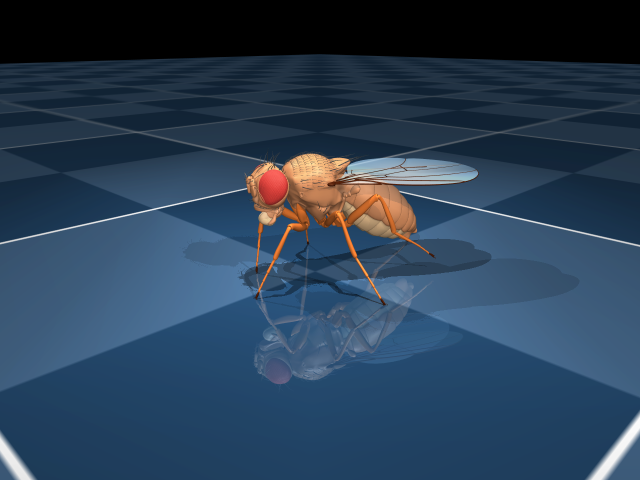

In [ ]:
_ = env.reset()
pixels = env.physics.render(camera_id=1, **render_kwargs)
PIL.Image.fromarray(pixels)

Create a dummy random-action policy, run an episode, and make video. The gray "ghost" fly indicates the reference fly position. Here, we will create a slightly different version of the random-action policy by shifting the random actions to make the video pretty.

In [ ]:
_random_policy = get_random_policy(env.action_spec(),
                                   minimum=-.5, maximum=.5)
def random_policy(observation):
    action = _random_policy(observation)
    # Transform random action centered around zero to canonical representation
    # to match CanonicalSpecWrapper we added to the walking environment above.
    action = real2canonical(action, env._environment.action_spec())
    return action

# Request a particular (sufficiently long) walking trajectory from dataset.
env.task.set_next_trajectory_index(idx=316)

frames = rollout_and_render(env, random_policy, run_until_termination=True,
                            camera_ids=2, **render_kwargs)
display_video(frames)

Let's load a trained policy, run an episode, and make video.

In [ ]:
walking_policy = tf.saved_model.load(walk_policy_path)
walking_policy = TestPolicyWrapper(walking_policy)

In [ ]:
# Request a particular (sufficiently long) walking trajectory from dataset.
env.task.set_next_trajectory_index(idx=316)

frames = rollout_and_render(env, walking_policy, run_until_termination=True,
                            camera_ids=2, **render_kwargs)
display_video(frames)

# 3. Vision-guided flight over uneven terrain ("bumps")

In this task, the fly model is required to fly over an uneven sine-like terrain while maintaining a constant z-offset (height) w.r.t. the current terrain elevation. The model does not have direct access to its flight height. Instead, it has to learn to use vision to estimate the current height and to adjust it to match the current terrain elevation. Collision with terrain terminates the episode. The terrain shape is randomly re-generated in each episode.

Let's create "bumps" vision task environment and visualize the initial state.

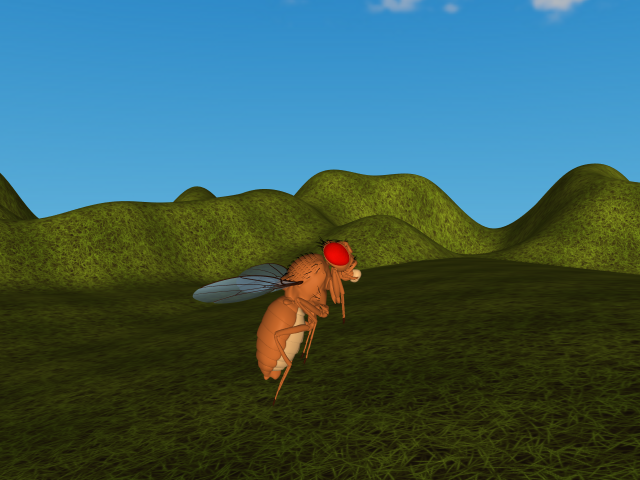

In [ ]:
env = vision_guided_flight(wpg_pattern_path, bumps_or_trench='bumps')
env = wrappers.SinglePrecisionWrapper(env)
env = wrappers.CanonicalSpecWrapper(env, clip=True)

timestep = env.reset()
pixels = env.physics.render(camera_id=1, **render_kwargs)
PIL.Image.fromarray(pixels)

Let's render a high-resolution view from the eye cameras in the initial episode state

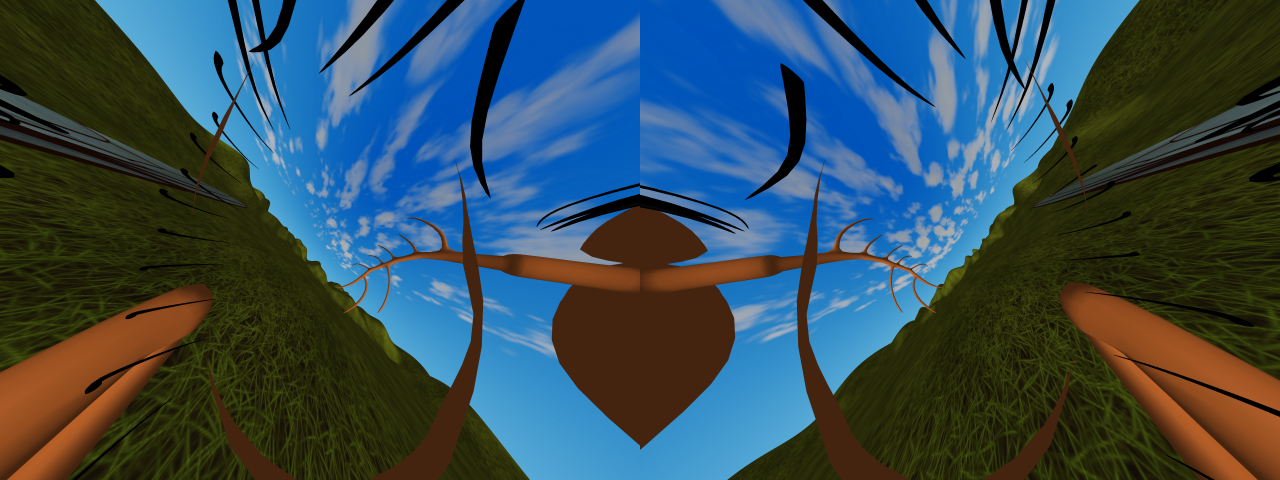

In [ ]:
pixels = eye_pixels_from_cameras(env.physics, **render_kwargs)
PIL.Image.fromarray(pixels)

In the same initial episode state, the actual low-resolution view available to the fly through its observables looks more like this:

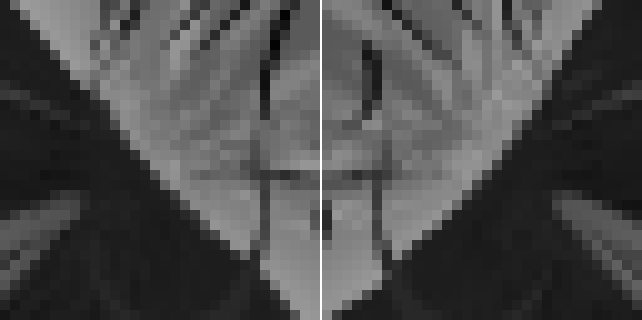

In [ ]:
pixels = eye_pixels_from_observation(timestep, blow_factor=10)
PIL.Image.fromarray(pixels)

Create dummy random-action policy, run episode, and make video.

In [ ]:
random_policy = get_random_policy(env.action_spec())

frames = vision_rollout_and_render(env, random_policy, **render_kwargs)
display_video(frames)

Load a trained policy, run an episode, and make video:

In [ ]:
bumps_policy = tf.saved_model.load(vision_bumps_path)
bumps_policy = TestPolicyWrapper(bumps_policy)

In [ ]:
frames = vision_rollout_and_render(env, bumps_policy, **render_kwargs)
display_video(frames)

# 4. Vision-guided flight through trench

In this task, the fly is required to make it through a zigzagging trench without colliding with the trench walls. Touching the terrain or the trench walls terminates the episode. The fly has to learn to use vision to estimate its position within the trench and to maneuver to stay clear of the trench walls. The shape of the trench is randomly re-generated in each episode.

Let's create the "trench" task environment and visualize the initial state

In [ ]:
env = vision_guided_flight(wpg_pattern_path, bumps_or_trench='trench')
env = wrappers.SinglePrecisionWrapper(env)
env = wrappers.CanonicalSpecWrapper(env, clip=True)

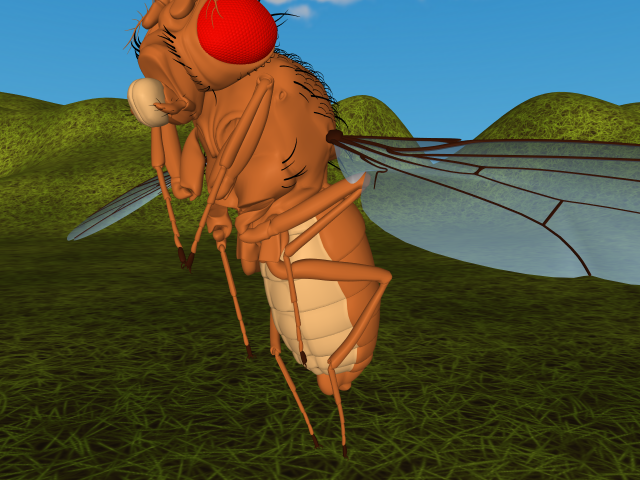

In [ ]:
_ = env.reset()
pixels = env.physics.render(camera_id=6, **render_kwargs)
PIL.Image.fromarray(pixels)

Let's add a new tracking camera for better trench task visualization:

In [ ]:
# Find thorax and add tracking camera to it.
thorax = env.task.root_entity.mjcf_model.find('body', 'walker/thorax')
_ = thorax.add('camera', name='rear', mode='trackcom',
               pos=(-1.566, 0.037, -0.021),
               xyaxes=(-0.014, -1, 0, -0.012, 0, 1))

Visualize the initial state with the new camera:

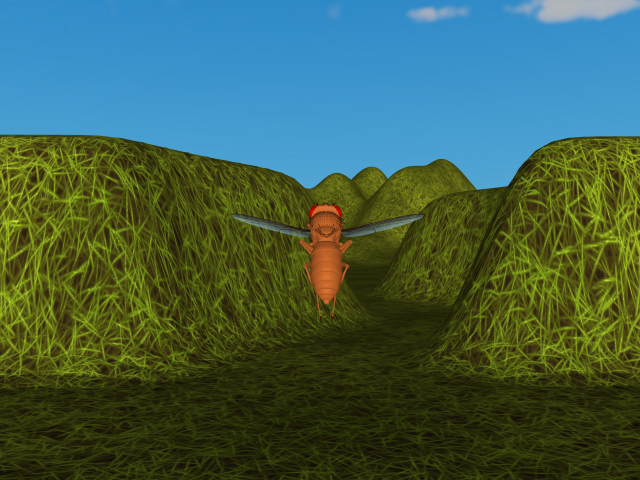

In [ ]:
timestep = env.reset()
trench_camera_id = env.physics.model.name2id('walker/rear', 'camera')
pixels = env.physics.render(camera_id=trench_camera_id, **render_kwargs)
PIL.Image.fromarray(pixels)

Let's render a high-resolution view from the eye cameras in the initial episode state:

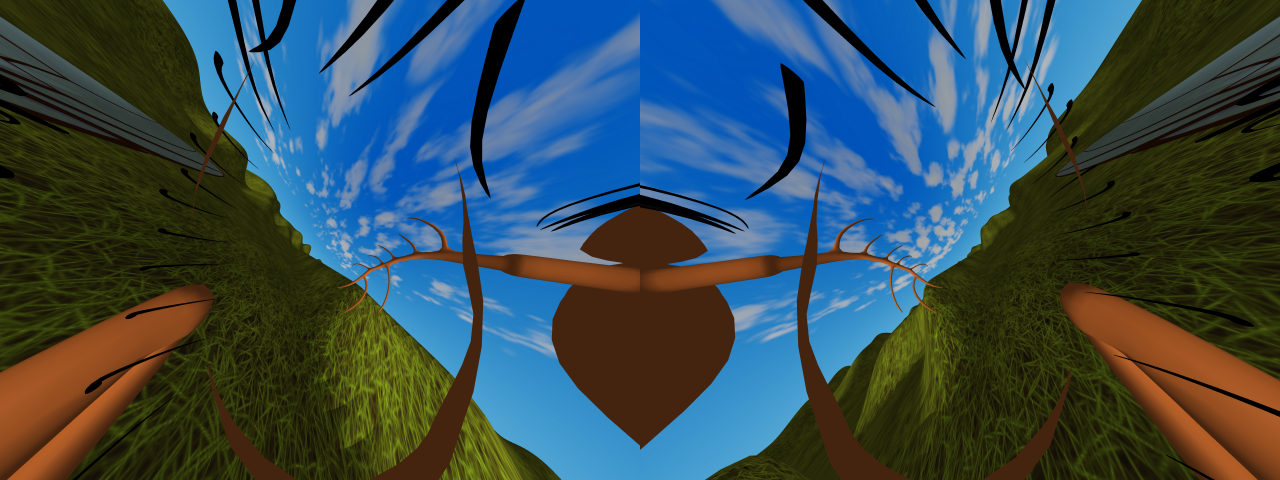

In [ ]:
pixels = eye_pixels_from_cameras(env.physics, **render_kwargs)
PIL.Image.fromarray(pixels)

And the corresponding low-resolution view used by the fly model:

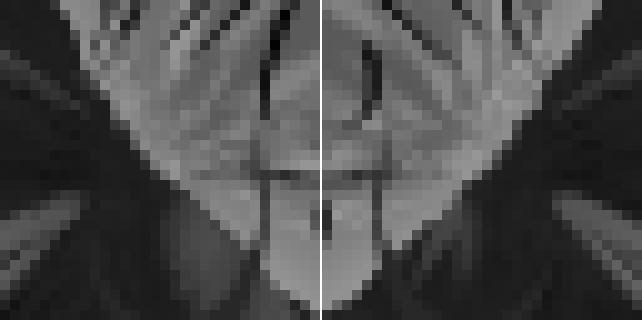

In [ ]:
pixels = eye_pixels_from_observation(timestep, blow_factor=10)
PIL.Image.fromarray(pixels)

As before, let's run an episode with the random-action policy:

In [ ]:
random_policy = get_random_policy(env.action_spec())

frames = vision_rollout_and_render(
    env, random_policy, camera_id=trench_camera_id, **render_kwargs)
display_video(frames)

Let's load a trained policy and run an episode:

In [ ]:
trench_policy = tf.saved_model.load(vision_trench_path)
trench_policy = TestPolicyWrapper(trench_policy)

In [ ]:
frames = vision_rollout_and_render(
    env, trench_policy, camera_id=trench_camera_id, **render_kwargs)
display_video(frames)

Thank you! We are happy you are interested in our fly model:)